# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# query_url = url + "appid=" + weather_api_key + "&q=" + city



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city 
    

#     print(city_url)
    

# Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
#         print(city_weather)

# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
       
        city_max_temp = city_weather["main"]["temp_max"]
       
        city_humidity = city_weather["main"]["humidity"]
       
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
       
        city_country = city_weather["sys"]["country"]
        
        city_date = city_weather["dt"]
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aklavik
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | todos santos
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | khonuu
City not found. Skipping...
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | san francisco
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | namtsy
Processing Record 13 of Set 1 | faya
Processing Record 14 of Set 1 | marystown
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | oussouye
Processing Record 17 of Set 1 | oyama
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | boa vista
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | novyy urengoy
Processing Record 22 of Set 1 |

Processing Record 35 of Set 4 | luanda
Processing Record 36 of Set 4 | bredasdorp
Processing Record 37 of Set 4 | progreso
Processing Record 38 of Set 4 | miranorte
City not found. Skipping...
Processing Record 39 of Set 4 | maykain
City not found. Skipping...
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | sao joao da barra
Processing Record 42 of Set 4 | faanui
Processing Record 43 of Set 4 | tukrah
Processing Record 44 of Set 4 | paragominas
Processing Record 45 of Set 4 | lorengau
Processing Record 46 of Set 4 | rio grande
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | nyrob
Processing Record 49 of Set 4 | pastavy
Processing Record 50 of Set 4 | chimbote
Processing Record 1 of Set 5 | hami
Processing Record 2 of Set 5 | fayaoue
Processing Record 3 of Set 5 | sakakah
Processing Record 4 of Set 5 | hamilton
Processing Record 5 of Set 5 | turayf
Processing Record 6 of Set 5 | necochea
Processing Record 7 of Set 5 | nara
Pro

Processing Record 23 of Set 8 | ambon
Processing Record 24 of Set 8 | shingu
Processing Record 25 of Set 8 | moron
Processing Record 26 of Set 8 | porto novo
Processing Record 27 of Set 8 | constitucion
Processing Record 28 of Set 8 | adrar
Processing Record 29 of Set 8 | naryan-mar
Processing Record 30 of Set 8 | santana do livramento
Processing Record 31 of Set 8 | altay
Processing Record 32 of Set 8 | kamaishi
Processing Record 33 of Set 8 | bemidji
Processing Record 34 of Set 8 | lata
Processing Record 35 of Set 8 | labrea
Processing Record 36 of Set 8 | zelenogradsk
Processing Record 37 of Set 8 | pinega
Processing Record 38 of Set 8 | sorland
Processing Record 39 of Set 8 | arcachon
Processing Record 40 of Set 8 | sasolburg
Processing Record 41 of Set 8 | pyu
Processing Record 42 of Set 8 | flinders
Processing Record 43 of Set 8 | kralendijk
Processing Record 44 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 45 of Set 8 | gogaran
Processing Record 46 of Se

Processing Record 9 of Set 12 | sisimiut
Processing Record 10 of Set 12 | pimenta bueno
Processing Record 11 of Set 12 | hihifo
City not found. Skipping...
Processing Record 12 of Set 12 | tagab
Processing Record 13 of Set 12 | almenevo
City not found. Skipping...
Processing Record 14 of Set 12 | kijang
Processing Record 15 of Set 12 | jalu
Processing Record 16 of Set 12 | gushikawa
Processing Record 17 of Set 12 | misratah
Processing Record 18 of Set 12 | teacapan
Processing Record 19 of Set 12 | beira
Processing Record 20 of Set 12 | leningradskiy
Processing Record 21 of Set 12 | petawawa
Processing Record 22 of Set 12 | bama
Processing Record 23 of Set 12 | taltal
Processing Record 24 of Set 12 | palmer
Processing Record 25 of Set 12 | oranjemund
Processing Record 26 of Set 12 | bereda
Processing Record 27 of Set 12 | puerto maldonado
Processing Record 28 of Set 12 | lincoln
Processing Record 29 of Set 12 | behbahan
Processing Record 30 of Set 12 | iquitos
Processing Record 31 of Se

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aklavik,68.2191,-135.0107,244.08,95,100,3.57,CA,1675822173
1,jamestown,42.0970,-79.2353,278.16,90,100,6.17,US,1675821999
2,todos santos,23.4500,-110.2167,293.40,67,98,5.43,MX,1675822644
3,kodiak,57.7900,-152.4072,270.88,50,0,7.20,US,1675822190
4,kapaa,22.0752,-159.3190,299.33,86,75,7.20,US,1675822105


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aklavik,68.2191,-135.0107,244.08,95,100,3.57,CA,1675822173
1,jamestown,42.0970,-79.2353,278.16,90,100,6.17,US,1675821999
2,todos santos,23.4500,-110.2167,293.40,67,98,5.43,MX,1675822644
3,kodiak,57.7900,-152.4072,270.88,50,0,7.20,US,1675822190
4,kapaa,22.0752,-159.3190,299.33,86,75,7.20,US,1675822105


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

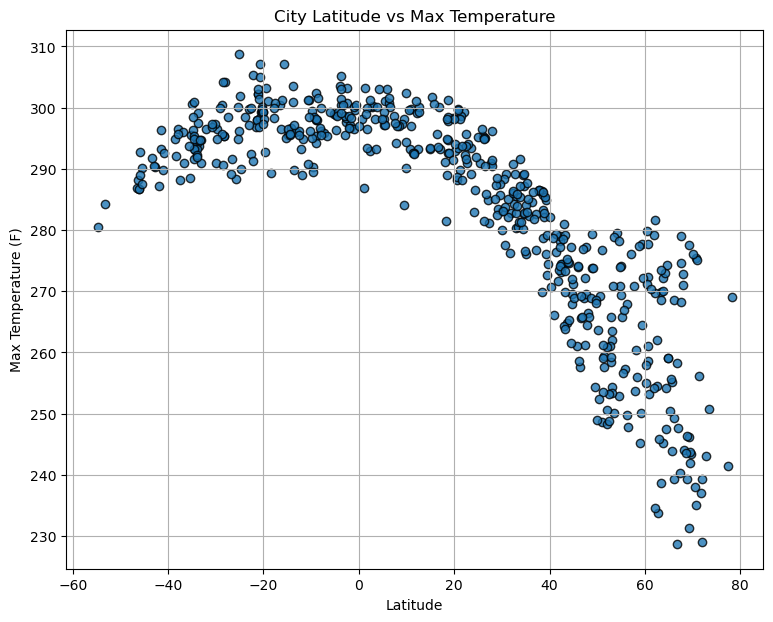

In [27]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(9,7))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.title(f"City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

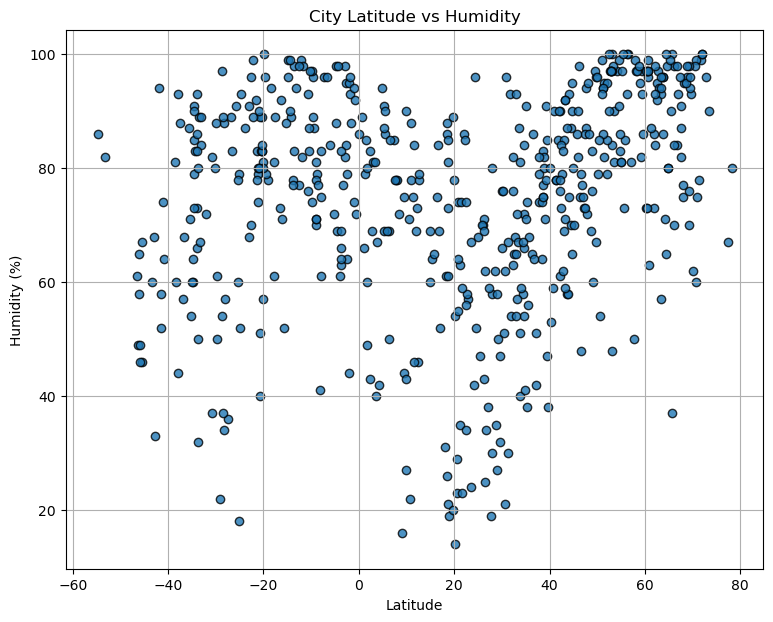

In [28]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(9, 7))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

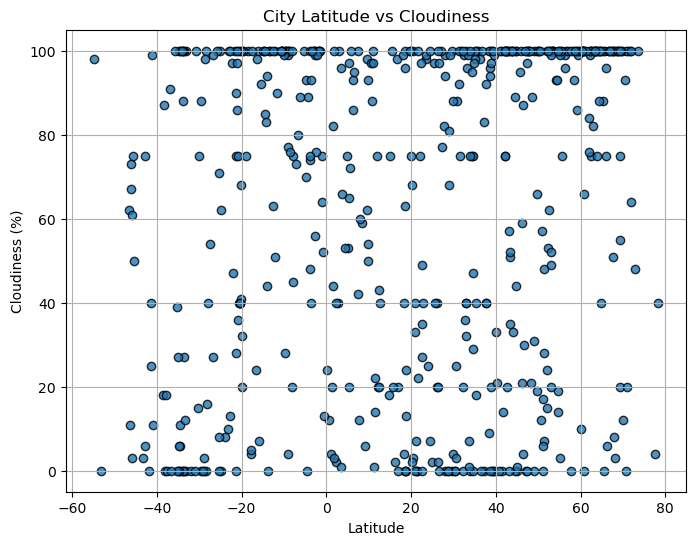

In [30]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(8,6))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

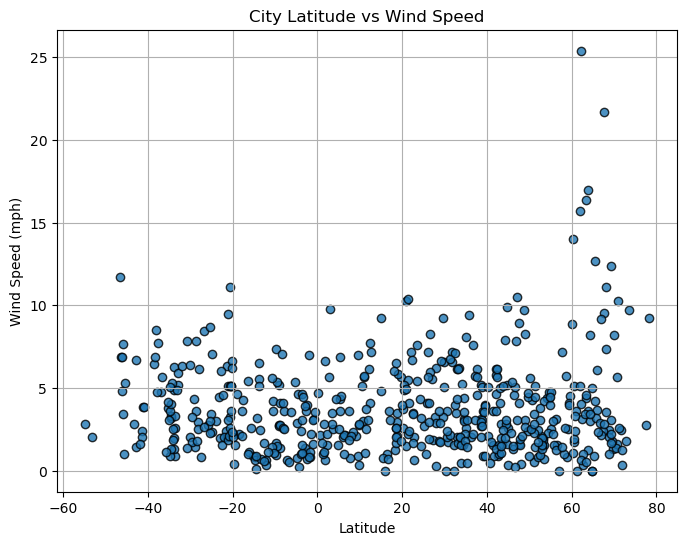

In [32]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(8,6))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}",fontsize = 10)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
        

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

NameError: name 'northern_hemi_df' is not defined

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE